<a href="https://colab.research.google.com/github/grommy/NLP_in_TensorFlow/blob/master/week_2/Exercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2019-07-22 10:11:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.25.208, 2404:6800:4004:801::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.25.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2019-07-22 10:11:08 (252 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'OOV'
training_portion = .8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [70]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
    csvfile.readline()
    labels = []
    sentences = []

    for line in csvfile:
      label, sentence = line.split(',')
      labels.append(label)
      sentences.append(sentence)
    labels = np.array(labels)  
    sentences = np.array(sentences)

    
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-i

In [71]:
train_size = round(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [72]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = np.array(tokenizer.texts_to_sequences(train_sentences))
train_padded = np.array(tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length, 
                                                             padding=padding_type, truncating=trunc_type))

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

750
120
300
120
311
120


In [83]:
print(validation_padded[10])
print(train_padded[10])

[ 192 1908  757  494    9  414  354  736  192   24 1578   31  414    3
    2  359    4  827   13  757  494    2 1695   20  464    2  414  312
    3   17    2   64  105    2  270  128   24   17   22    1 1665   13
   11  530   87   54  332  166    8 1127   68    2  685  646   10   67
    2  354    1    2   70    8 4508    5 9340  256 4160   12   10  312
    3  117   55  135    4    2  222    5  417    1    9    2  128  876
  187   13  193  124  110  248    8  414   24   17   32  192    8 3259
  154  104  262    3  413    7 1576   60    6  124  128   10  245   51
   62   17   19  387   19  561  383  164]
[2526 8782    9  325 5073   90    6  753  701   53   35  325 5073 7221
    1   20 1764 8783 9855   22 2526   90  680 6190 7222    2  239  383
    1    2  239  383    4    2  906    4    2  931  773 2402 7222 1255
   15 1793    5    1   18  107 1820 5074    7    1    9 6654 7916    1
    2    1 4819    4 9856 6191  221 4599    1   14   27   21    6 2969
    4 1610    3  461    2 4820    4

In [74]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = tf.keras.preprocessing.sequence.pad_sequences(validation_sequences, maxlen=max_length, 
                                                                  padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [93]:
label_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=6, oov_token=oov_tok)
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[1]
[3]
[2]
(1780, 1)
[5]
[1]
[4]
(445, 1)


In [96]:
validation_label_seq_cat = tf.keras.utils.to_categorical(validation_label_seq)
training_label_seq_cat = tf.keras.utils.to_categorical(training_label_seq)
print(training_label_seq_cat.shape)
print(validation_label_seq_cat.shape)

(1780, 6)
(445, 6)


In [97]:
label_tokenizer.word_index

{'OOV': 1,
 'business': 3,
 'entertainment': 5,
 'politics': 4,
 'sport': 2,
 'tech': 6}

In [98]:
model = tf.keras.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [99]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, validation_data=(validation_padded, validation_label_seq), epochs=num_epochs)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 [==============================] - 0s 174us/sample - loss: 1.7513 - acc: 0.3876 - val_loss: 1.6978 - val_acc: 0.5843
Epoch 2/30
1780/1780 [==============================] - 0s 112us/sample - loss: 1.6242 - acc: 0.6230 - val_loss: 1.5425 - val_acc: 0.6562
Epoch 3/30
1780/1780 [==============================] - 0s 105us/sample - loss: 1.4082 - acc: 0.6787 - val_loss: 1.3009 - val_acc: 0.6966
Epoch 4/30
1780/1780 [==============================] - 0s 106us/sample - loss: 1.1117 - acc: 0.7596 - val_loss: 1.0218 - val_acc: 0.7955
Epoch 5/30
1780/1780 [==============================] - 0s 107us/sample - loss: 0.8230 - acc: 0.9000 - val_loss: 0.7875 - val_acc: 0.8899
Epoch 6/30
1780/1780 [==============================] - 0s 107us/sample - loss: 0.5927 - acc: 0.9466 - val_loss: 0.6115 - val_acc: 0.9191
Epoch 7/30
1780/1780 [==============================] - 0s 106us/sample - loss: 0.4252 - acc: 0.9674 - val_loss: 0.4934 - val

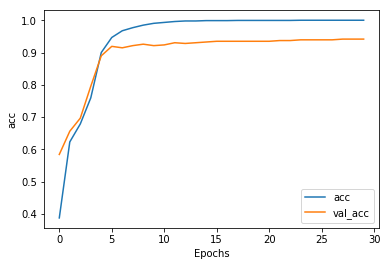

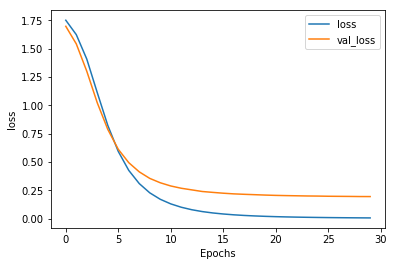

In [100]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [102]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')